Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/01/12 18:24:19 WARN Utils: Your hostname, gpuana02, resolves to a loopback address: 127.0.1.1; using 192.168.1.216 instead (on interface enp4s0)
26/01/12 18:24:19 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
26/01/12 18:24:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/12 18:24:20 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
26/01/12 18:24:20 WARN RapidsPluginUtils: RAPIDS Accelerator 25.10.0 using cudf 25.10.0, private revision 28e7c65b3c0526baba384d9b97ee12e4d6766d9a
26/01/12 18:24:20 WARN RapidsPluginUtils: RAPIDS Accelerator is enabled, to disable

Total entries: 161535, Underflow: 0, Inside: 161531, Overflow: 4
Total entries: 161535, Underflow: 0, Inside: 161498, Overflow: 37


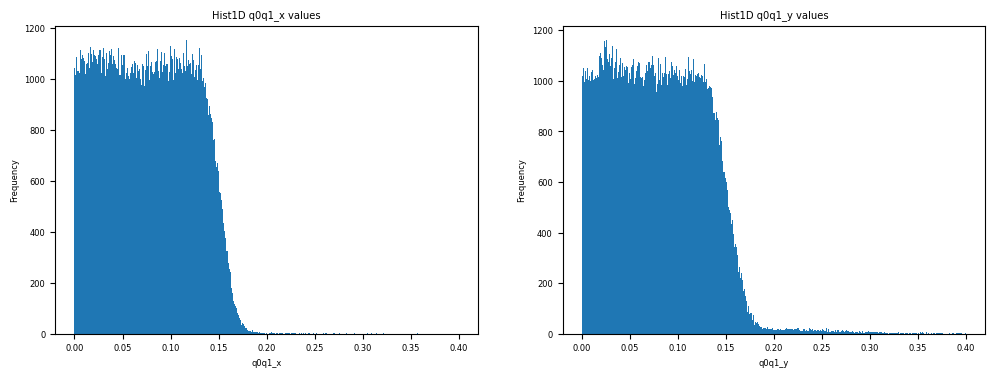

prm/srppac_q0q1_x_run1011.csv
ここまで
ファイル 'prm/srppac_q0q1_x_run1011.csv' に保存しました。
prm/srppac_q0q1_y_run1011.csv
ここまで
ファイル 'prm/srppac_q0q1_y_run1011.csv' に保存しました。


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from matplotlib import pyplot as plt
from hist.sparkHist1d import Hist1D

from make_SRPPAC_prm import dq_calib_data
import numpy as np

spark = SparkSession.builder.master("local[10]").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

df = spark.read.parquet("run1011_srppac.parquet")
runname = df.select("runname").collect()[0][0]

NBINS = 400
HIST_RANGE = (0,0.4)

plt.figure(0, figsize=(12,4))
plt.rcParams["font.size"] = 6
ax =plt.subplot2grid((1,2),(0,0))
Center_x, Hx = Hist1D(df, "q0q1_x",NBINS,HIST_RANGE)
ax =plt.subplot2grid((1,2),(0,1))
Center_y, Hy = Hist1D(df, "q0q1_y",NBINS,HIST_RANGE)
plt.show()

r = dq_calib_data(Hx,"prm/srppac_q0q1_x_{}.csv".format(runname),HIST_RANGE,NBINS)
r = dq_calib_data(Hy,"prm/srppac_q0q1_y_{}.csv".format(runname),HIST_RANGE,NBINS)

